# YouTube the world most famous video sharing platform.

## YouTube trend patterns from the top 5

### Prerequisites EDA
#### The visualization we will perform mainly uses Plotly; we will often need to transform data using Pandas. These libraries are beneficial and visual in any exploratory data analysis and visualization.

Imports libraries to manipulate data, NLP, regex, visualizations, and interactive buttons.

Working with Jupyter Notebooks…

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import re
import string
import nltk
import spacy
import plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import cufflinks
import ipywidgets as widgets
import warnings
import json
import datetime
import advertools as adv

from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from youtubesearchpython import *
from youtubesearchpython import VideosSearch
from youtubesearchpython import ChannelsSearch
from youtubesearchpython import Suggestions
from subprocess import check_output
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from plotly.offline import iplot, init_notebook_mode
from ipywidgets import interact, interact_manual
from numpy import mean
from numpy import std

warnings.filterwarnings('ignore')
# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)
cufflinks.go_offline(connected=True)
#pd.options.display.max_columns = None

#from nltk.corpus import stopwords
#stopwords = nltk.corpus.stopwords.words('english')

#Basic configurations for improving visualization of graphs
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes',
       labelpad=20,
       facecolor="#ffffff",
       linewidth=0.4,
       grid=True,
       labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

##### We are importing the dataset using YouTube API and collecting the top channels in the platform.

The imported dataset is from YouTube API. For this project, we will analyze the top 5 channels worldwide and then focus on the data from Germany to get our conclusion on how to create a popular video.

In [ ]:
api_key = 'APIKEY'
youtube = build('youtube', 'v3', developerKey=api_key)

In [3]:
#regions = adv.youtube.i18n_regions_list(key=api_key, part='snippet', hl=['en'])
'''top5_world_chl = adv.youtube.channels_list(key=key,
                                           part='snippet,statistics,contentDetails,topicDetails',
                                           chart='mostPopular', 
                                           regionCode=regions['id'].tolist(),
                                           maxResults=5)'''
#top5_world_chl

### Top channels:
- T-Series
- Speed Records
- T-Series Apna Punjab
- Zee Music Company
- KatyPerryVEVO

In this exploratory data analysis, we aim to understand the dataset better and determine if the views differ by video categories and if the quality of the video title affects its views. Let's start by creating functions to facilitate data analysis.

In [4]:
#function to get snippet by channel
def get_snippett(name):
    return youtube.search().list(part="snippet", type="channel",
                                 q=name).execute()

snippets1 = get_snippett("T-Series")
snippets2 = get_snippett("Speed Records")
snippets3 = get_snippett("T-Series Apna Punjab")
snippets4 = get_snippett("Zee Music Company")
snippets5 = get_snippett("KatyPerryVEVO")

In [5]:
#save the channels to analyze
snippet_name = [
    "T-Series", "Speed Records", "T-Series Apna Punjab", "Zee Music Company",
    "KatyPerryVEVO"
]

In [6]:
dict_snippet = {}
for name in range(len(snippet_name)):
    dict_snippet[f"snippets{name+1}"] = get_snippett(name)

In [ ]:
#snippets3 #test to view the snippets videos
for i in dict_snippet:
    print(dict_snippet[i]['items'])
    #print ("-------------------------------------------")

In [ ]:
all_snippets = []
for i in dict_snipet:
    all_snippets.append(i)

In [12]:
#to view the first channel ids
all_snippets = [snippets1, snippets2, snippets3, snippets4, snippets5]
dict_channelId = {}
for allsnipt in range(len(all_snippets)):
    dict_channelId["channelId{0}".format(
        allsnipt)] = all_snippets[allsnipt]['items'][0]['snippet']['channelId']
    #print(d["channelId{0}".format(i)])
print(
    f'The first channel IDs from the list are: \nT-Series: {channelId1}, \nSpeed Records: {channelId2}, \nT-Series Apna Punjab: {channelId3}, \nZee Music Company: {channelId4}, \nKatyPerryVEVO: {channelId5}'
)

The first channel IDs from the list are: 
T-Series: UCq-Fj5jknLsUf-MWSy4_brA, 
Speed Records: UCOsyDsO5tIt-VZ1iwjdQmew, 
T-Series Apna Punjab: UCcvNYxWXR_5TjVK7cSCdW-g, 
Zee Music Company: UCFFbwnve3yF62-tVXkTyHqg, 
KatyPerryVEVO: UC-8Q-hLdECwQmaWNwXitYDw


In [13]:
#to visualize the first channels published dates
print(
    f'Channel {snippets1["items"][0]["snippet"]["title"]} is published at {snippets1["items"][0]["snippet"]["publishedAt"]}, \nChannel {snippets2["items"][0]["snippet"]["title"]} is published at {snippets2["items"][0]["snippet"]["publishedAt"]}, \nChannel {snippets3["items"][0]["snippet"]["title"]} is published at {snippets3["items"][0]["snippet"]["publishedAt"]}, \nChannel {snippets4["items"][0]["snippet"]["title"]} is published at {snippets4["items"][0]["snippet"]["publishedAt"]}, \nChannel {snippets5["items"][0]["snippet"]["title"]} is published at {snippets5["items"][0]["snippet"]["publishedAt"]}'
)

Channel T-Series is published at 2006-03-13T14:27:05Z, 
Channel Speed Records is published at 2012-11-22T10:36:15Z, 
Channel T-Series Apna Punjab is published at 2011-09-26T11:44:33Z, 
Channel Zee Music Company is published at 2014-03-12T11:59:25Z, 
Channel KatyPerryVEVO is published at 2009-12-13T03:04:53Z


In [14]:
#to save all channels stats and contents
all_channelIds = [channelId1, channelId2, channelId3, channelId4, channelId5]
dict_stats = {}
dict_content = {}
for allchlid in range(len(all_channelIds)):
    dict_stats["stats{0}".format(allchlid)] = youtube.channels().list(
        part="statistics", id=all_channelIds[allchlid]).execute()
    dict_content["content{0}".format(allchlid)] = youtube.channels().list(
        id=all_channelIds[allchlid], part='contentDetails').execute()

In [19]:
#to save all upload playlist
all_content = [content1, content2, content3, content4, content5]
dict_UploadId = {}
for allcnet in range(len(all_content)):
    dict_UploadId["UploadId{0}".format(allcnet)] = all_content[allcnet][
        'items'][0]['contentDetails']['relatedPlaylists']['uploads']
print(
    f'The Id of the upload playlist of channel \n#1:{UploadId1}, \n#2:{UploadId2}, \n#3:{UploadId3}, \n#4:{UploadId4}, \n#5:{UploadId5}. \nAll uploaded videos by these channels.'
)

The Id of the upload playlist of channel 
#1:UUq-Fj5jknLsUf-MWSy4_brA, 
#2:UUOsyDsO5tIt-VZ1iwjdQmew, 
#3:UUcvNYxWXR_5TjVK7cSCdW-g, 
#4:UUFFbwnve3yF62-tVXkTyHqg, 
#5:UU-8Q-hLdECwQmaWNwXitYDw. 
All uploaded videos by these channels.


Having all of the ids and dates, now we want to extract all of the videos related information

In [20]:
#to save all videos
def list_items(id_):
    allVideos = []
    nextPage_token = None

    while 1:
        res = youtube.playlistItems().list(playlistId=id_,
                                           maxResults=50,
                                           part='snippet',
                                           pageToken=nextPage_token).execute()
        allVideos += res['items']
        nextPage_token = res.get('nextPageToken')
        if nextPage_token is None:
            break
    return allVideos

In [22]:
#to save all uploadid
all_UploadId = [UploadId1, UploadId2, UploadId3, UploadId4, UploadId5]
for allupld in range(len(all_UploadId)):
    dict_UploadId["allVideos{0}".format(allupld)] = list_items(
        all_UploadId[allupld])

In [36]:
print(
    f'total number of videos uploaded on channel \n#1:{len(allVideos1)}, \n#2:{len(allVideos2)}, \n#3:{len(allVideos3)}, \n#4:{len(allVideos4)}, \n#5:{len(allVideos5)}'
)
#allVideos1[0]['snippet']
#len(allVideos1)

total number of videos uploaded on channel 
#1:15974, 
#2:9730, 
#3:5859, 
#4:5883, 
#5:165


In [39]:
all_video_ids = [video_ids1, video_ids2, video_ids3, video_ids4, video_ids5]
dict_video_ids = {}
for allvidids in range(len(all_video_ids)):
    dict_video_ids["allVideos{0}".format(allvidids)] = list(
        map(lambda x: x['snippet']['resourceId']['videoId'], allVideos1))
#print(len(video_ids1))

In [99]:
stats = []
for vids in range(0, len(video_ids1), 40):
    res = (youtube).videos().list(id=','.join(video_ids1[vids:vids + 40]),
                                  part='statistics').execute()
    stats += res['items']
#print(stats1)
stats1[0]

{'kind': 'youtube#video',
 'etag': 'NNd3SoTvatBgeIexnLFLDcUTVRE',
 'id': 'Qf6HOtAVUOk',
 'statistics': {'viewCount': '36525',
  'likeCount': '226',
  'dislikeCount': '42',
  'favoriteCount': '0',
  'commentCount': '18'}}

In [172]:
title = []
liked = []
disliked = []
views = []
url = []
comment = []
videoid = []
publishedDate = []
video_description = []

for i in range(len(allVideos1)):
    #print(i)
    #i += 1
    title.append((allVideos1[i])['snippet']['title'])
    publishedDate.append((allVideos1[i])['snippet']['publishedAt'])
    video_description.append((allVideos1[i])['snippet']['description'])
    try:
        liked.append(int((stats1[i])['statistics']['likeCount']))
    except:
        liked.append(0)
    try:
        disliked.append(int((stats1[i])['statistics']['dislikeCount']))
    except:
        disliked.append(0)
    try:
        views.append(int((stats1[i])['statistics']['viewCount']))
    except:
        views.append(0)
    try:
        comment.append(int((stats1[i])['statistics']['commentCount']))
    except:
        comment.append(0)
    videoid.append(allVideos1[i]['snippet']['resourceId']['videoId'])

In [173]:
#to save clean data
data1 = {
    'title': title,
    'videoIDs': videoid,
    'video_description': video_description,
    'publishedDate': publishedDate,
    'likes': liked,
    'dislikes': disliked,
    'views': views,
    'comment': comment
}
dftseries = pd.DataFrame.from_dict(data1, orient='index')
dftseries = dftseries.transpose()
dftseries.sort_values(by='likes', ascending=False).head()

title     videoIDs  \
3278  Vaaste Song: Dhvani Bhanushali, Tanishk Bagchi...  BBAyRBTfsOU   
969   Lut Gaye (Full Song) Emraan Hashmi, Yukti | Ju...  sCbbMZ-q4-I   
1025  Saiyaan Ji ► Yo Yo Honey Singh, Neha Kakkar|Nu...  VEkj2sanAeU   
2628  Full Song: KHAIRIYAT (BONUS TRACK) | CHHICHHOR...  hoNb6HuNmU0   
1279  Naach Meri Rani: Guru Randhawa Feat. Nora Fate...  TCx1yMegJ4A   

                                      video_description         publishedDate  \
3278  Gulshan Kumar Presents latest Hindi Video Song...  2019-04-06T10:57:48Z   
969   Gulshan Kumar & T-Series presents Bhushan Kuma...  2021-02-16T17:06:00Z   
1025  Gulshan Kumar & T-Series presents Bhushan Kuma...  2021-01-26T05:54:58Z   
2628  Presenting the full video "KHAIRIYAT (BONUS TR...  2019-09-25T07:27:44Z   
1279  Gulshan Kumar and T-Series presents Bhushan Ku...  2020-10-17T10:55:33Z   

         likes dislikes       views comment  
3278  10584567   856743  1302955711  331378  
969    9016641   783587  1030506678  327254  
1025   5744601   516774   477269806  291169  
2628   5563646   283641   713161985  230450  
1279   5410300   512332   573304063  193943

In [137]:
dftseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15974 entries, 0 to 15973
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              15974 non-null  object
 1   videoIDs           15974 non-null  object
 2   video_description  15974 non-null  object
 3   publishedDate      15974 non-null  object
 4   likes              15974 non-null  object
 5   dislikes           15974 non-null  object
 6   views              15974 non-null  object
 7   comment            15974 non-null  object
dtypes: object(8)
memory usage: 998.5+ KB


In [118]:
#Getting search suggestions
suggestions = Suggestions(language='en', region='DE')
print(suggestions.get('T-Series', mode=ResultMode.json))

{
    "result": [
        "t-series",
        "t-series mixtape",
        "t-series song",
        "t-series vs pewdiepie",
        "t-series mixtape season 3",
        "t-series 100 million play button",
        "t-series bhakti sagar",
        "t-series diss track",
        "t-series mixtape punjabi",
        "t-series kids hut",
        "t-series mixtape season 1",
        "t-series movie",
        "t-series mixtape season 2",
        "t-series mixtape s3"
    ]
}


In [112]:
print(suggestions.get('T-Series Apna Punjab', mode=ResultMode.json))

{
    "result": [
        "t-series apna punjabi song",
        "t-series apna punjab",
        "t-series apna punjab song",
        "t-series apna punjab punjabi song",
        "t-series apna punjab new song",
        "t-series apna punjab movie",
        "t-series apna punjab channel",
        "t-series apna punjab contact number",
        "t-series apna punjab mp3 song download",
        "t-series apna punjab office",
        "t series apna punjab new song 2021",
        "t series apna punjab old songs",
        "t series apna punjab new song 2020",
        "t series apna punjab sad song"
    ]
}


In [113]:
print(suggestions.get('Zee Music Company', mode=ResultMode.json))

{
    "result": [
        "zee music company",
        "zee music company new song",
        "zee music company song",
        "zee music company hot romantic songs",
        "zee music company marathi",
        "zee music company gujarati",
        "zee music company dance",
        "zee music company new song 2021",
        "zee music company romantic song",
        "zee music company bhojpuri",
        "zee music company cg",
        "zee music company romantic video",
        "zee music company hot songs 2021",
        "zee music company sad song"
    ]
}


In [114]:
print(suggestions.get('KatyPerryVEVO', mode=ResultMode.json))

{
    "result": [
        "katy perry vevo",
        "katy perry vevo songs",
        "katy perry vevo certified",
        "katy perry vevo playlist",
        "katy perry vevo bon appetit",
        "katy perry vevo dark horse",
        "katyperryvevo en espa\u00f1ol"
    ]
}


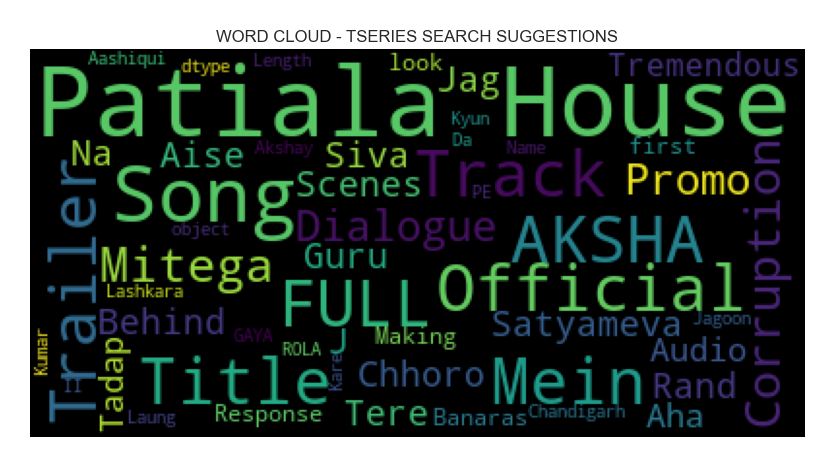

In [153]:
plt.rcParams['font.size'] = 15
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.subplot.bottom'] = .1
stopwords = nltk.corpus.stopwords.words('english')
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(background_color='black',
                      stopwords=stopwords,
                      max_words=1000,
                      max_font_size=120,
                      random_state=42).generate(str(dftseries['title']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TSERIES SEARCH SUGGESTIONS")
plt.axis('off')
plt.show()

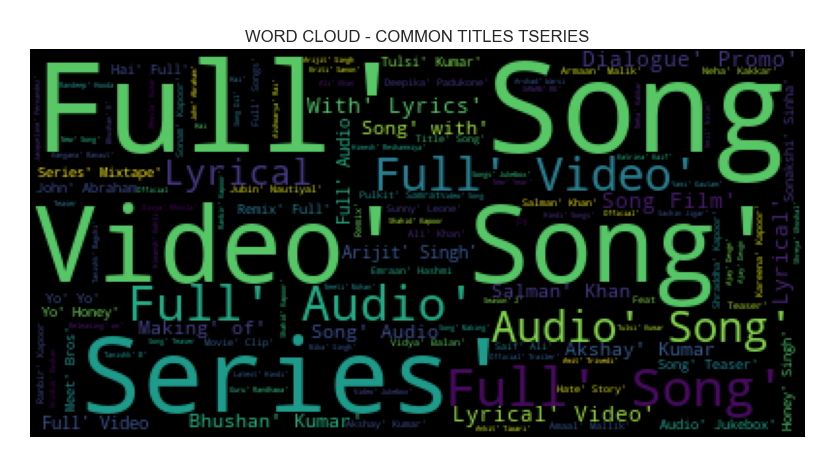

In [157]:
plt.rcParams['font.size'] = 15
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.subplot.bottom'] = .1
stopwords = nltk.corpus.stopwords.words('english')
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(background_color='black',
                      stopwords=stopwords,
                      max_words=1000,
                      max_font_size=120,
                      random_state=42).generate(str(title_words))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - COMMON TITLES TSERIES")
plt.axis('off')
plt.show()

### Graphs visualisation - Metrics views by:
Daily line chart 23 March 2017 - November 2021
- Channel
- Video
- Geography
- Traffic source
- Device
- Gender
- Age

Columns to review:
- Views: Total views for the selected date range, region and other filters.
- Average view duration: Estimated average minutes watched per view for the selected content, date range, region and other filters.
- Watch time (hours): Estimated total hours of viewing time of the content from audience.
- Impressions: How many times the video thumbnails were shown to viewers. Includes only impressions on YouTube, not on external sites or apps.
- Impressions click-through rate: Views per impressions shown. This measures how of ten viewers watched a video after seeing an impression. Wondering whether the impressions click-through rate is high or low?
- Average percentage viewed: Average percentage of a video your audience watches per view.

![alt text](Images/Graph_TopChannel-YT.png "TopChannel")
![alt text](Images/List_TopChannel-YT.png "TopChannel")

View by Channel:
The graph is shown from 2017 to 2021, and we can observe the top 5 channels on YouTube and review the information on when was the channels was first started, which on average has around ten years on the platform:
- Channel T-Series was published in 2006, 
- Channel Speed Records was published in 2012, 
- Channel T-Series Apna Punjab was published in 2011, 
- Channel Zee Music Company was published in 2014, 
- Channel KatyPerryVEVO was published in 2009.

![alt text](Images/Graph_TopVideo-YT.png "TopVideo")
![alt text](Images/List_TopVideo-YT.png "TopVideo")

Views by video:
In the previous graph, we see the top channels and in this one we will observe the top 5 videos along with their views, watch time, and the average view duration.

![alt text](Images/Graph_TopGeo-YT.png "TopGeo")
![alt text](Images/List_TopGeo-YT.png "TopGeo")

Views by Geography: We have seen the top 5 for YouTube channels and videos, but it is also interesting to know which countries the viewers are coming from.

![alt text](Images/Graph_TopTraffic-YT.png "TopTraffic")
![alt text](Images/List_TopTraffic-YT.png "TopTraffic")

Views by traffic source: The top videos usually come from the suggested videos on the history of the videos views of each user, and secondly from search, also very interesting to see the Shorts feed increases, this is something that needs to explore more, this is a new function that released at the end of 2020 which supposedly is something similar like TikTok or Instagram stories.

![alt text](Images/Graph_TopDevice-YT.png "TopDevice")

Views by device: it is a clear dominance in mobile phone utilization since smartphones have more presence in the market, and business create their app version; this is one of the favorite devices by many; using mobile phones, we can assume that many looking YouTube when in mobilization.

![alt text](Images/Graph&List_ViewGender-YT.png "ViewGender")
![alt text](Images/Graph_ViewAge-YT.png "ViewAge")
![alt text](Images/List_ViewAge-YT.png "ViewAge")

Views by gender and age: lastly, in gender and age, looking at these graphs, I think there is no surprise that most of the audience are men aged 18 to 34 because most of the content is created and targeted for these audiences.

## YouTube trend patterns in Germany

### Statistics, exploratory data analysis for an approach of analyzing data sets

After learning the data from the top ones worldwide, now we will create and import focusing in one country data trends, Germany.

In [12]:
'''dfde
 .query('param_regionCode=="DE"')
 .dropna(subset=['statistics.viewCount'])
 .sort_values('statistics.viewCount', ascending=False)
 [['snippet.title', 'statistics.viewCount']]
 .style.format({'statistics.viewCount': '{:,}'})
dfde.to_csv('DE_youtube_trending_data.csv')'''
df_ytrendsde = pd.read_csv(
    "DE_youtube_trending_data.csv"
)

Let’s start off by understanding the variables in our data.

In [13]:
#Looking for Null values and the types of our data
df_ytrendsde.info()
#df_ytrendsde.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92544 entries, 0 to 92543
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           92544 non-null  object
 1   title              92544 non-null  object
 2   publishedAt        92544 non-null  object
 3   channelId          92544 non-null  object
 4   channelTitle       92544 non-null  object
 5   categoryId         92544 non-null  int64 
 6   trending_date      92544 non-null  object
 7   tags               92544 non-null  object
 8   view_count         92544 non-null  int64 
 9   likes              92544 non-null  int64 
 10  dislikes           92544 non-null  int64 
 11  comment_count      92544 non-null  int64 
 12  thumbnail_link     92544 non-null  object
 13  comments_disabled  92544 non-null  bool  
 14  ratings_disabled   92544 non-null  bool  
 15  description        91156 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

In [40]:
#visualize data and sort it by likes
df_ytrendsde.sort_values(by='likes', ascending=False).head()

video_id                               title           publishedAt  \
3152   gdZLi9oWNZg  BTS (방탄소년단) 'Dynamite' Official MV  2020-08-21T03:58:10Z   
2920   gdZLi9oWNZg  BTS (방탄소년단) 'Dynamite' Official MV  2020-08-21T03:58:10Z   
2681   gdZLi9oWNZg  BTS (방탄소년단) 'Dynamite' Official MV  2020-08-21T03:58:10Z   
2427   gdZLi9oWNZg  BTS (방탄소년단) 'Dynamite' Official MV  2020-08-21T03:58:10Z   
55952  WMweEpGlu_U    BTS (방탄소년단) 'Butter' Official MV  2021-05-21T03:46:13Z   

                      channelId    channelTitle  categoryId  \
3152   UC3IZKseVpdzPSBaWxBxundA  Big Hit Labels          10   
2920   UC3IZKseVpdzPSBaWxBxundA  Big Hit Labels          10   
2681   UC3IZKseVpdzPSBaWxBxundA  Big Hit Labels          10   
2427   UC3IZKseVpdzPSBaWxBxundA  Big Hit Labels          10   
55952  UC3IZKseVpdzPSBaWxBxundA     HYBE LABELS          10   

              trending_date                             tags  view_count  \
3152   2020-08-27T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   219110491   
2920   2020-08-26T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   208581468   
2681   2020-08-25T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   200692965   
2427   2020-08-24T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   183414472   
55952  2021-05-23T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   166895681   

          likes  dislikes  comment_count  \
3152   15460845    674292        5810618   
2920   15246529    646350        5744554   
2681   14994061    621587        5623584   
2427   14678118    576854        5748679   
55952  14202546     51664        5987755   

                                       thumbnail_link  comments_disabled  \
3152   https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg              False   
2920   https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg              False   
2681   https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg              False   
2427   https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg              False   
55952  https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg              False   

       ratings_disabled                                        description  
3152              False  BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...  
2920              False  BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...  
2681              False  BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...  
2427              False  BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...  
55952             False  BTS (방탄소년단) 'Butter' Official MV Credits: Dire...

Let's see the correlation between the data

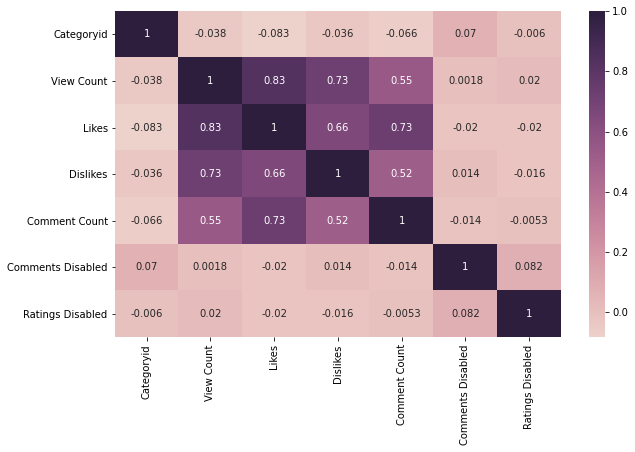

In [17]:
#df_ytrendsde.corr()
h_labels = [
    x.replace('_', ' ').title() for x in list(
        df_ytrendsde.select_dtypes(include=['number', 'bool']).columns.values)
]
fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(df_ytrendsde.corr(),
                annot=True,
                xticklabels=h_labels,
                yticklabels=h_labels,
                cmap=sns.cubehelix_palette(as_cmap=True),
                ax=ax)

Text(0.5, 1.0, 'Heat Map')

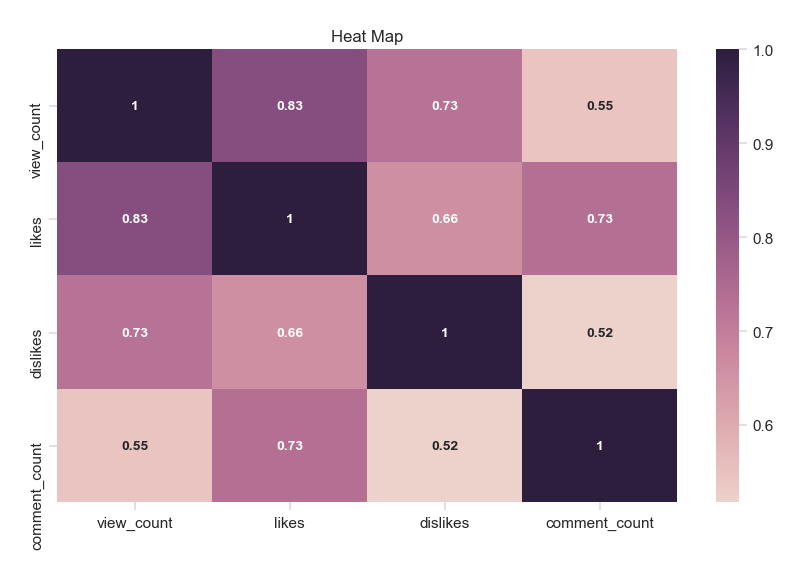

In [39]:
trends = df_ytrendsde.drop(
    ['video_id', 'categoryId', 'comments_disabled', 'ratings_disabled'],
    axis=1)
correlation = trends.corr()
fig = plt.figure(figsize=(10, 6))
sns.heatmap(correlation,
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True),
            annot_kws={'weight': 'bold'})
plt.title('Heat Map')

The correlation map and correlation table above say that views and likes are highly positively correlated.

Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables.

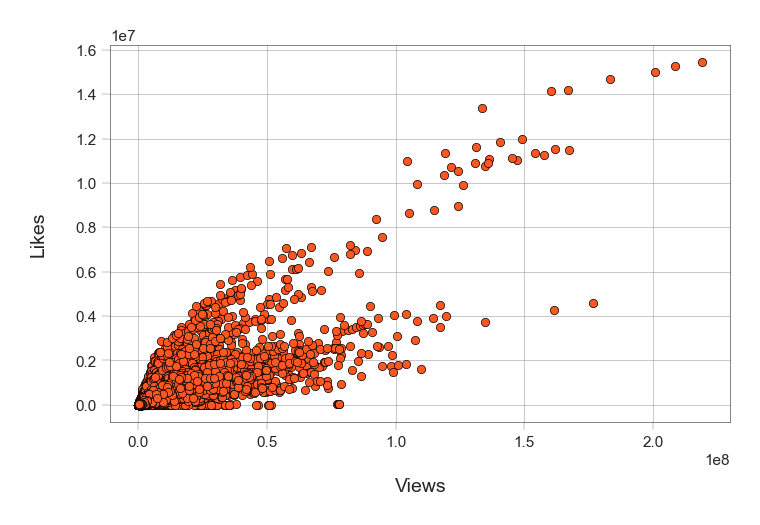

In [28]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df_ytrendsde['view_count'],
                y=df_ytrendsde['likes'],
                color=PLOT_COLORS[2],
                edgecolors="#000000",
                linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too — mostly.

In [39]:
def Outliers(df_num, df):
    # calculate summary statistics
    data_mean, data_std = mean(df_num), std(df_num)
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in df_num if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df_num if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    df_without_outliers = df[df_num.isin(outliers_removed)]
    return df_without_outliers

Looking at the columns, we will be focusing on views and see the distribution for views.

Identified outliers: 1411
Non-outlier observations: 91133


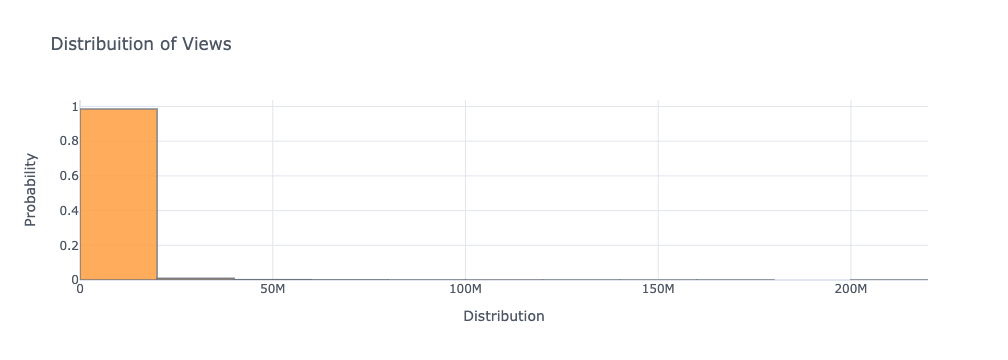

In [41]:
Outliers(df_ytrendsde['view_count'], df_ytrendsde)

df_ytrendsde['view_count'].iplot(kind="histogram",
                                 bins=20,
                                 theme="white",
                                 histnorm='probability',
                                 title="Distribuition of Views",
                                 xTitle='Distribution',
                                 yTitle='Probability')

Analyzig the Distribution of Views graph, we can see that most videos get less than 5 million views, and there are also outliers, that most likely the videos that go viral.

### Video Category

We understand that certain categories get more views than others, and we will explore the video categories available, as well as how often videos get posted in each of them.

In [66]:
rename_channels = {
    1: 'Film/Animation',
    2: 'Cars/Vehicles',
    10: 'Music',
    15: 'Pets/Animals',
    17: 'Sport',
    19: 'Travel/Events',
    20: 'Gaming',
    22: 'People/Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News/Politics',
    26: 'How to/Style',
    27: 'Education',
    28: 'Science/Technology',
    29: 'Non Profits/Activism'
}
df_ytrendsde['category_name'] = np.nan
df_ytrendsde['category_name'] = df_ytrendsde['categoryId'].map(rename_channels)
percent_category = round(df_ytrendsde["category_name"].value_counts(), 2)
categories = round(
    df_ytrendsde["category_name"].value_counts() /
    len(df_ytrendsde["category_name"]) * 100, 2)
labels = list(categories.index)
values = list(categories.values)
category_sum_count = (df_ytrendsde.drop_duplicates(subset=['title']).dropna(
    subset=['view_count']).groupby('category_name').agg(
        {'view_count': ['count',
                        'sum']})['view_count'].sort_values('sum',
                                                           ascending=False))
#category_sum_count.style.format({'sum': '{:,}'})

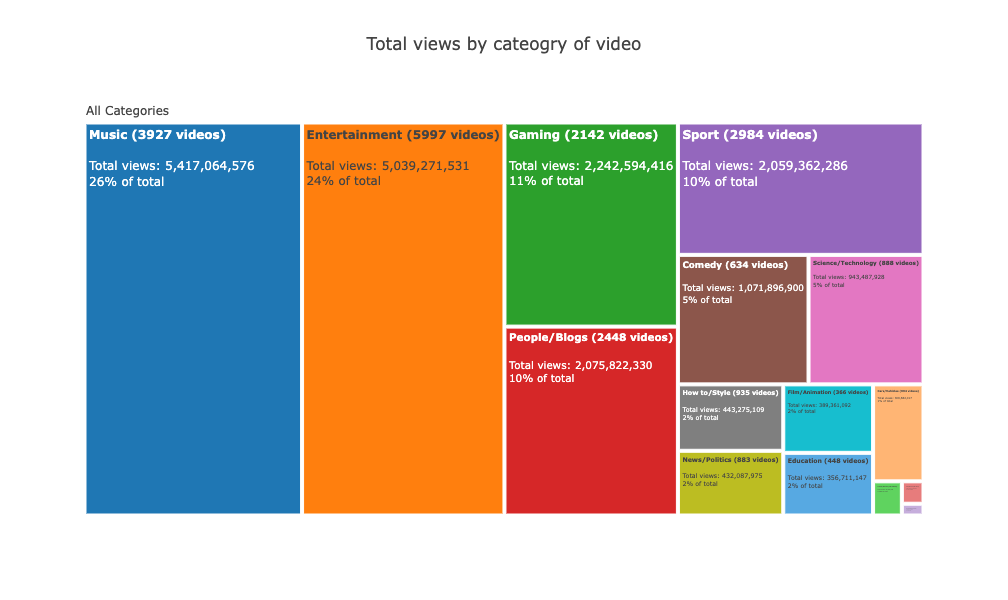

In [67]:
fig = go.Figure()
labels = (category_sum_count.index.astype(str) + ' (' +
          category_sum_count['count'].astype(str) + ' videos)').values
trace1 = fig.add_treemap(
    labels=labels,
    parents=['All Categories' for i in range(len(category_sum_count))],
    values=category_sum_count['sum'],
    texttemplate=
    '<b>%{label}</b><br><br>Total views: %{value}<br>%{percentParent} of total',
    hovertext=(percent_category.values.astype(str)))
fig.layout.template = 'none'
fig.layout.height = 600
fig.layout.title = 'Total views by cateogry of video'
iplot(fig)

It looks like in Germany, the top 3 categories with the most videos are:
- Music
- Entertainment
- Gaming
And the top 3 least favorites videos are:
- Travel/Events
- Pets/Animals
- Non Profits/Activism

This information is essential knowledge to understand our competition if we post in any of these categories. Most videos are posted by celebrities or entertainment companies rather than YouTubers in the Music and Entertainment category. Hence, it would make sense that the quality and quantity of their video outputs exceed any of us. And interestingly, gaming and sport come in as one of the highest ones as well, so we can assume entertainment-related has a high demand in this particular country.

Having the most videos by these categories is very helpful to understand the trends, and it will insightful to see if they have the most views as well.

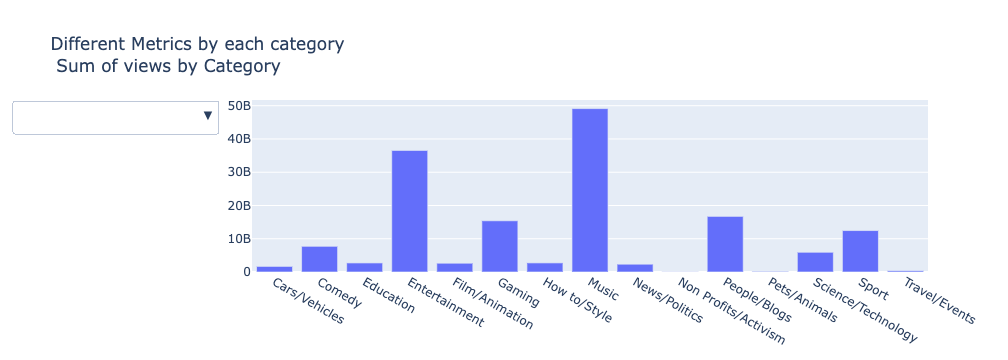

In [68]:
trace1 = go.Bar(x=df_ytrendsde.groupby(['category_name'
                                        ])['view_count'].sum().index,
                y=df_ytrendsde.groupby(['category_name'
                                        ])['view_count'].sum().values,
                name='Total Views by Category',
                visible=True)
trace2 = go.Bar(x=df_ytrendsde.groupby(['category_name'
                                        ])['channelTitle'].nunique().index,
                y=df_ytrendsde.groupby(['category_name'
                                        ])['channelTitle'].nunique().values,
                name='Unique Channels by Category',
                visible=False)
data = [trace1, trace2]
updatemenus = list([
    dict(
        active=-1,
        showactive=True,
        buttons=list([
            dict(label='Total Views by Category',
                 method='update',
                 args=[{
                     'visible': [True, False, False]
                 }, {
                     'title': 'Sum of views by Category'
                 }]),
            dict(label='Total Channels by Category',
                 method='update',
                 args=[{
                     'visible': [False, True, False]
                 }, {
                     'title': 'Total Channels by Category'
                 }]),
        ]),
    )
])
layout = dict(
    title='Different Metrics by each category <br> Sum of views by Category',
    showlegend=False,
    updatemenus=updatemenus)
fig = dict(data=data, layout=layout)
iplot(fig)

The Music and Entertainment categories do hold the most views and channels. Interestingly, even with more videos being posted in the Entertainment category, more views are in the Music category. The more channels a category has, the more saturated the channels are, so better to focus on the fewer ones.

We explore more on the saturation topic by creating metrics on videos and channels to see how many views each video and channel get by category. By doing this, we can roughly gauge how saturated a specific category is.

In [243]:
#saturation metrics by category
views_list = np.array(
    df_ytrendsde.groupby(['category_name'])['view_count'].sum().tolist())
channels_list = np.array(
    df_ytrendsde.groupby(['category_name'])['channelTitle'].nunique().tolist())
videos_list = np.array(
    df_ytrendsde.groupby(['category_name'])['title'].nunique().tolist())
views_by_videos = views_list / videos_list
views_by_channels = views_list / channels_list

When starting off as a YouTuber, we don’t want to enter a saturated video category. Unless you have an extremely unfair advantage, otherwise it would be wise to enter categories that are more welcoming to newbies. Imagine competiting with the likes of ‘JayZ’ in Music, not a good ending.

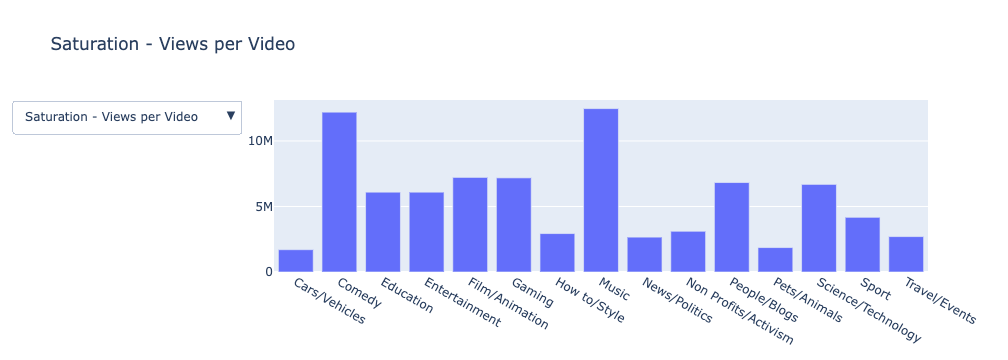

In [244]:
trace1 = go.Bar(x=df_ytrendsde.groupby(['category_name'
                                        ])['title'].nunique().index,
                y=views_by_videos,
                name='Saturation - Views per Video',
                visible=True)
trace2 = go.Bar(x=df_ytrendsde.groupby(['category_name'
                                        ])['title'].nunique().index,
                y=views_by_channels,
                name='Saturation - Views per Channel',
                visible=True)
data = [trace1, trace2]
updatemenus = list([
    dict(
        active=-1,
        showactive=True,
        buttons=list([
            dict(label='Saturation - Views per Video',
                 method='update',
                 args=[{
                     'visible': [True, False]
                 }, {
                     'title': 'Saturation - Views per Video'
                 }]),
            dict(label='Saturation - Views per Channel',
                 method='update',
                 args=[{
                     'visible': [False, True]
                 }, {
                     'title': 'Saturation - Views per Channel'
                 }]),
        ]),
    )
])
layout = dict(title='*(Select from Dropdown)* Saturation Metrics by Category',
              showlegend=False,
              updatemenus=updatemenus)
fig = dict(data=data, layout=layout)
iplot(fig)

From the plots, we can see that music is still the leader in views per video, and interestingly, Comedy is leading the views per channel. However, Science/Technology holds a pretty decent number in both views per video and channel. Looking at the previous chart, the video and channel count in Science/Technology has one of the lowest numbers in both counts.

This means that the category has the least videos and channels but has one of the highest views per video and channel. Hence, this would be an ideal category to enter.

If I were to pick one, I would choose the Science/Technology category. The data does not have too many videos and channels, but the views per video and views per channel numbers are incredibly high. In addition, technology is in my area of interest, so that's a plus.

### Video Title

Now that we have chosen a category, it's time to explore the video title.
As many YouTubers have mentioned, the video title and thumbnail matter.

You can have an extremely well-made video. Without a good video title and thumbnail, no one is going to click into it — every YouTuber ever
Hence, let's make sure our video title is optimized to gain more views.

Let's first look at the word count in titles and tags
and how it affects our views.

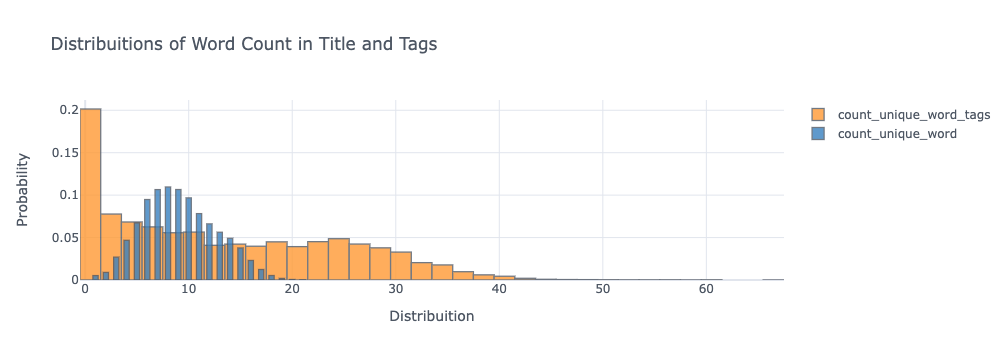

In [245]:
#Unique word count
df_ytrendsde['count_unique_word'] = df_ytrendsde["title"].apply(
    lambda x: len(set(str(x).split())))
df_ytrendsde['count_unique_word_tags'] = df_ytrendsde["tags"].apply(
    lambda x: len(set(str(x).split())))
df_ytrendsde[['count_unique_word_tags', 'count_unique_word'
              ]].iplot(kind="histogram",
                       bins=50,
                       theme="white",
                       histnorm='probability',
                       title="Distribuitions of Word Count in Title and Tags",
                       xTitle='Distribuition',
                       yTitle='Probability')

Looking at the distribution of the word count.
For video titles, it looks like the majority of video titles have between 5 to 10 words. For video tags, majority of the video tags have less than 20 words.

We can take this as a reference. Let’s look how it affects views.

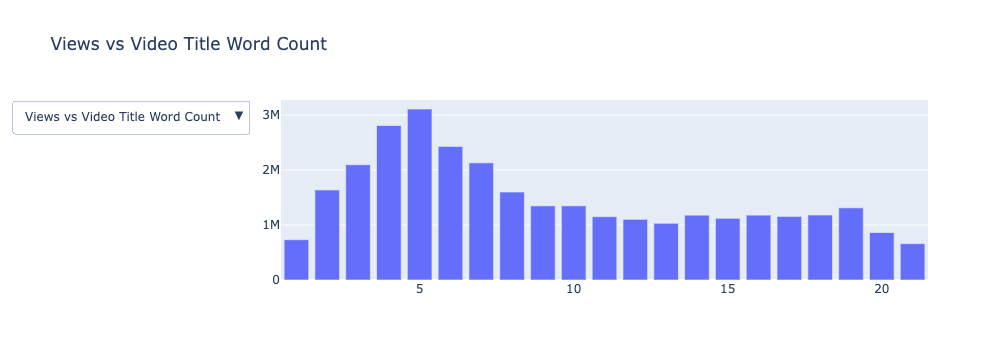

In [246]:
# Dataframe for unique word count for video titles
dfuvtl = df_ytrendsde[['count_unique_word', 'view_count']]
dfuvtl = dfuvtl.groupby('count_unique_word').mean().reset_index()
# Dataframe for unique word count for video tags
dfuvtg = df_ytrendsde[['count_unique_word_tags', 'view_count']]
dfuvtg = dfuvtg.groupby('count_unique_word_tags').mean().reset_index()
trace1 = go.Bar(x=dfuvtl['count_unique_word'],
                y=dfuvtl['view_count'],
                name='Views vs Video Title Word Count',
                visible=True)
trace2 = go.Bar(x=dfuvtg['count_unique_word_tags'],
                y=dfuvtg['view_count'],
                name='Views vs Video Tags Word Count',
                visible=True)
data = [trace1, trace2]

updatemenus = list([
    dict(
        active=-1,
        showactive=True,
        buttons=list([
            dict(label='Views vs Video Title Word Count',
                 method='update',
                 args=[{
                     'visible': [True, False]
                 }, {
                     'title': 'Views vs Video Title Word Count'
                 }]),
            dict(label='Views vs Video Tags Word Count',
                 method='update',
                 args=[{
                     'visible': [False, True]
                 }, {
                     'title': 'Views vs Video Tags Word Count'
                 }]),
        ]),
    )
])
layout = dict(title="*(Select from Dropdown)* Views vs Word Count",
              showlegend=False,
              updatemenus=updatemenus)
fig = dict(data=data, layout=layout)
iplot(fig)

Interesting. For video titles word count, titles with 5 words get the most views. The views increases until 5 after that for each word count the views decrease and get into flatline. This information would suggest our video title length to be either 2 words or less than 7 words.

For video tags word count, videos with 61 word tags have the highest peak view count. The views at between 1 to 50 word tags have the average line of views.

### Video Title/Tags Content

Now that we know roughly how long our video titles and tags are, we want to know what kind of words to put in there. By exploring words content, we can roughly see what kind of words other Youtubers put in their videos. We can use the word cloud plot to clearly visualize these words.

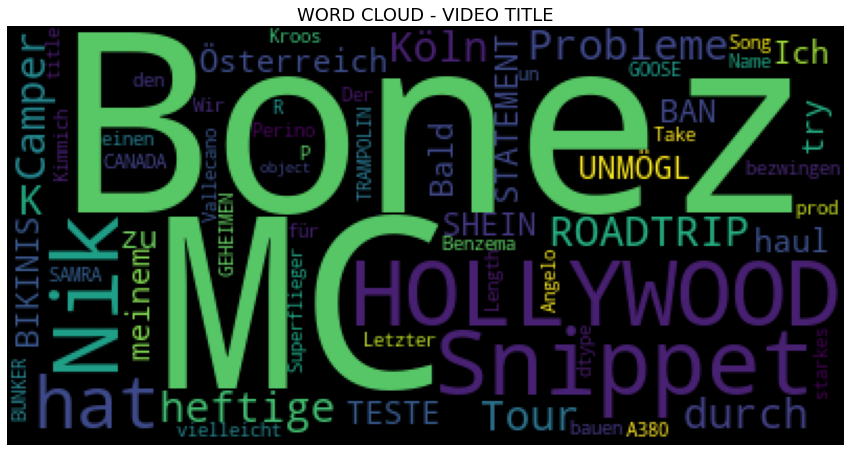

In [171]:
plt.rcParams['font.size'] = 15
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.subplot.bottom'] = .1
stopwords = set(stopwords.words("english"))
plt.figure(figsize=(15, 15))
wordcloud = WordCloud(background_color='black',
                      stopwords=stopwords,
                      max_words=1000,
                      max_font_size=120,
                      random_state=42).generate(str(df['title']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - VIDEO TITLE")
plt.axis('off')
plt.show()

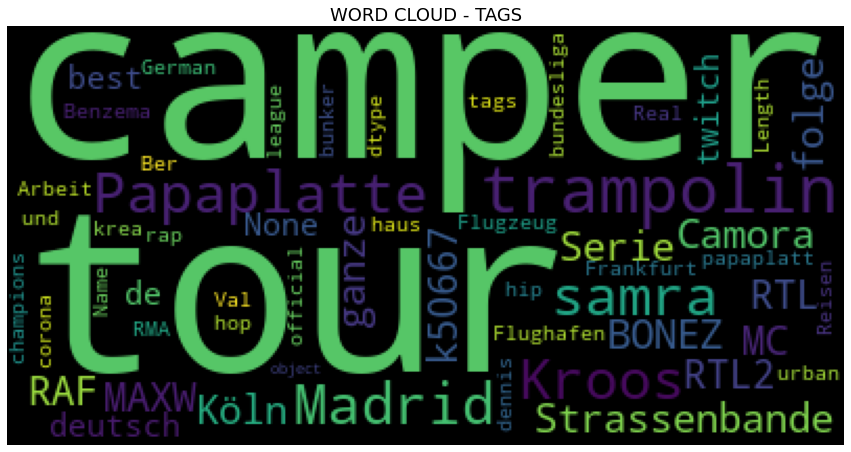

In [159]:
plt.figure(figsize=(15, 15))
wordcloud = WordCloud(background_color='black',
                      stopwords=stopwords,
                      max_words=1000,
                      max_font_size=120,
                      random_state=42).generate(str(df['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

We can see that the most brought up word for video titles is 'BONEZ' and 'MC'. There's a reason these words appear the most, and we will have to explore further to understand the data better.

For video tags, we can see that the most brought up word is 'CAMPER', 'TOUR', 'MADRID', and 'TRAMPOLIN'. These are pretty general words. Again, we will have to analyze deeper to understand this data.

### Conclusion

We have got to this far, and you must want to get that Youtube Money.
If that's the case, you have to follow these instructions on your Youtube Journey, and you'll probably be set for life.
- Create videos in the Science/Technology category
- Have video titles of either four words or between 5 to 10 words
- Have plenty of video tags as possible; between 50 to 60 tags is recommendable
- BONEZ and MC were included the most in video titles — find out why
- CAMPER, TOUR, MADRID, and TRAMPOLIN were included the most in video tags — find out why

This presentation was an exploratory analysis of a small portion of YouTube data from Germany and selected top channels. If you're not on the same page yet, this data only serves as a reference and has no proof of ever bringing you more views. It will not accurately display the behavior of views anywhere, including Germany.

I hope this has been fun for you, as for me, and I am not done with my data journey yet. I am working on more stories, writings, and guides in the data industry.